In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#input data
df = pd.read_csv("US_honey_dataset.csv")
df.head(5)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [5]:
#dropping unwanted column
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.head(10)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995
5,Florida,230000,86,19780000,1780000,63.0,12461000,1995
6,Georgia,70000,62,4340000,260000,69.0,2995000,1995
7,Hawaii,8000,129,1032000,103000,55.0,568000,1995
8,Idaho,125000,48,6000000,1020000,65.0,3900000,1995
9,Illinois,11000,74,814000,212000,102.0,830000,1995


In [8]:
df.tail(10)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1105,SouthDakota,250000,49,5268000,5268000,2.27,27808000,2021
1106,Tennessee,8000,56,81000,81000,5.00,2240000,2021
1107,Texas,137000,56,384000,384000,2.30,17646000,2021
1108,Utah,31000,33,92000,92000,2.18,2230000,2021
1109,Vermont,7000,47,76000,76000,3.28,1079000,2021
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1114,Wyoming,38000,58,242000,242000,2.07,4562000,2021


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [11]:
#checking if all the states are unique
df['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
#checking if all the states are unique
df['state'].value_counts()

Alabama          27
Missouri         27
Arizona          27
NewJersey        27
NewYork          27
NorthCarolina    27
NorthDakota      27
Ohio             27
Oregon           27
Pennsylvania     27
SouthDakota      27
Tennessee        27
Texas            27
Utah             27
Vermont          27
Virginia         27
Washington       27
WestVirginia     27
Wisconsin        27
Montana          27
Nebraska         27
Mississippi      27
Minnesota        27
Arkansas         27
California       27
Colorado         27
Florida          27
Georgia          27
Hawaii           27
Idaho            27
Illinois         27
Indiana          27
Iowa             27
Kansas           27
Louisiana        27
Maine            27
Michigan         27
Wyoming          27
Kentucky         26
NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

In [12]:
#counting unique states
df['state'].nunique()

44

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

In [15]:
df.duplicated().value_counts()

False    1115
dtype: int64

In [13]:
#check for missing values - all 0 means no Null values; else, that many rows has Null values
df.isna().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [16]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

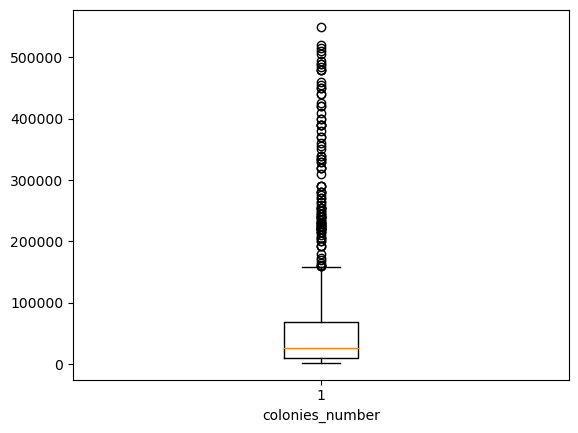

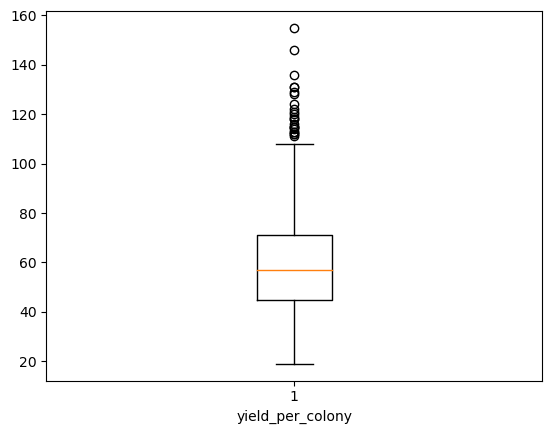

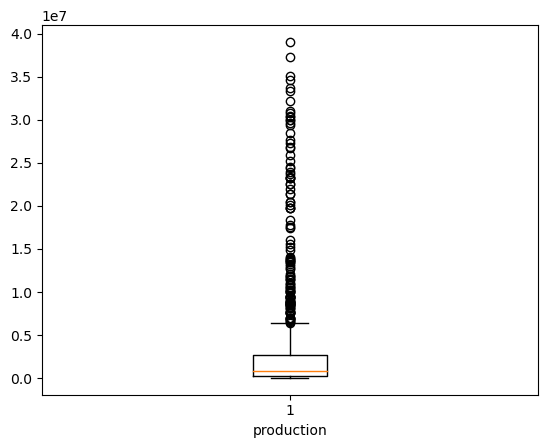

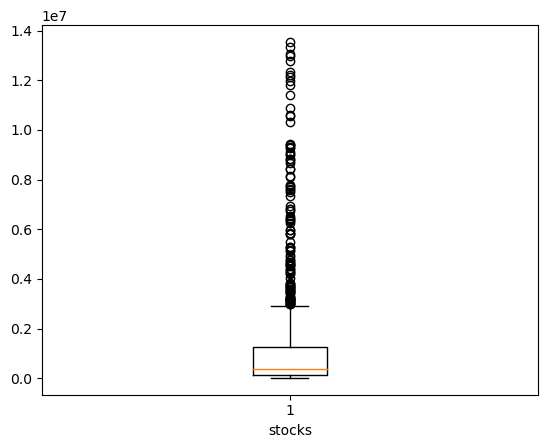

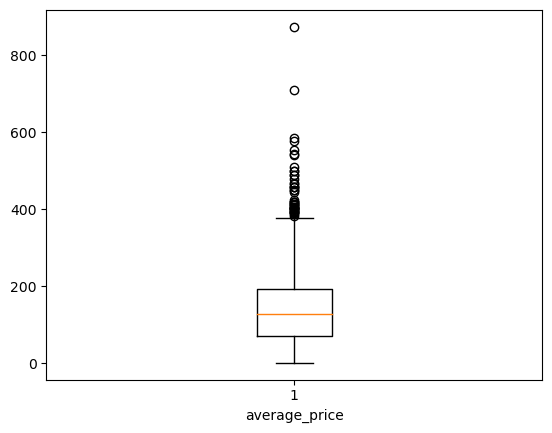

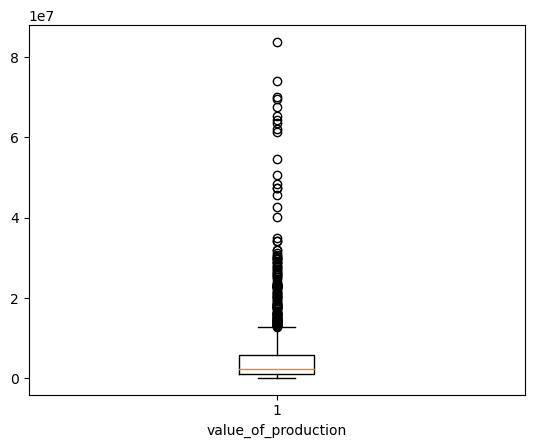

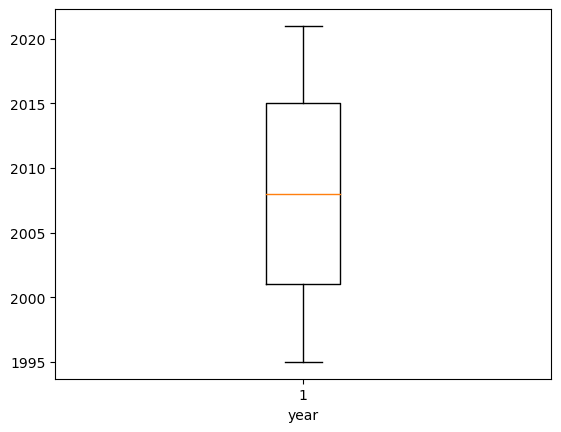

In [17]:
#extract all cols that are'nt object
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [18]:
#as the data is less, ignore the outliers

### Analyzing inferences from data

Q1. Which states are rarely contributing honey production since last 27 yrs?

In [21]:
data = df['state'].value_counts()
data.index

Index(['Alabama', 'Missouri', 'Arizona', 'NewJersey', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'SouthDakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'WestVirginia', 'Wisconsin', 'Montana', 'Nebraska',
       'Mississippi', 'Minnesota', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Louisiana', 'Maine', 'Michigan', 'Wyoming', 'Kentucky',
       'NewMexico', 'Nevada', 'SouthCarolina', 'Oklahoma', 'Maryland'],
      dtype='object')

In [22]:
data.values

array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 26, 18, 15, 12,  9,  9], dtype=int64)

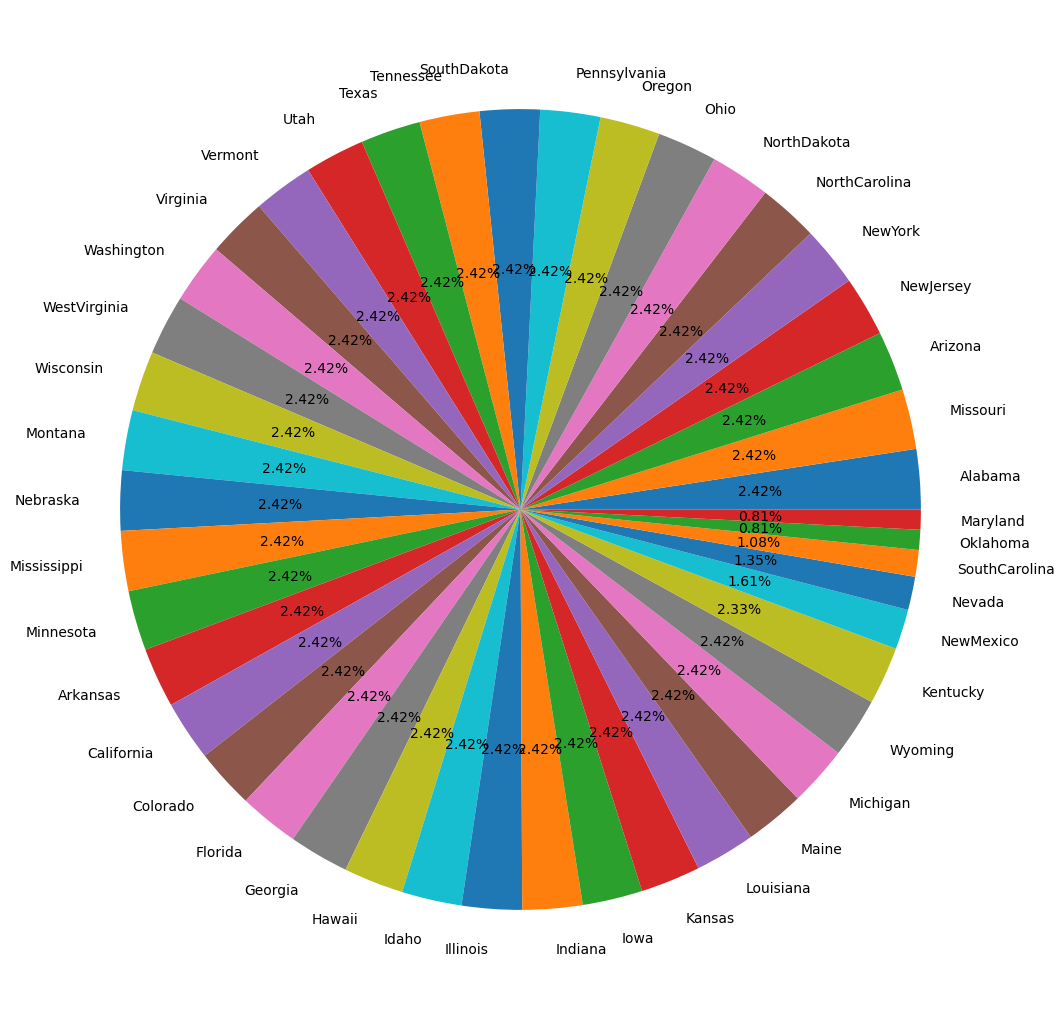

In [27]:
plt.figure(figsize=(13,13))
plt.pie(data.values, labels=data.index, autopct="%1.2f%%")
plt.show()

In [28]:
#inference: top 5 states contributing less in Last 27 years are::
#maryland 9 #oklamhoma 9
#south carolino 12
#new mexico 18
#nevada 15

In [29]:
data[data<data.mean()]

NewMexico        18
Nevada           15
SouthCarolina    12
Oklahoma          9
Maryland          9
Name: state, dtype: int64

Q2. Which are the top 5 states producing honey

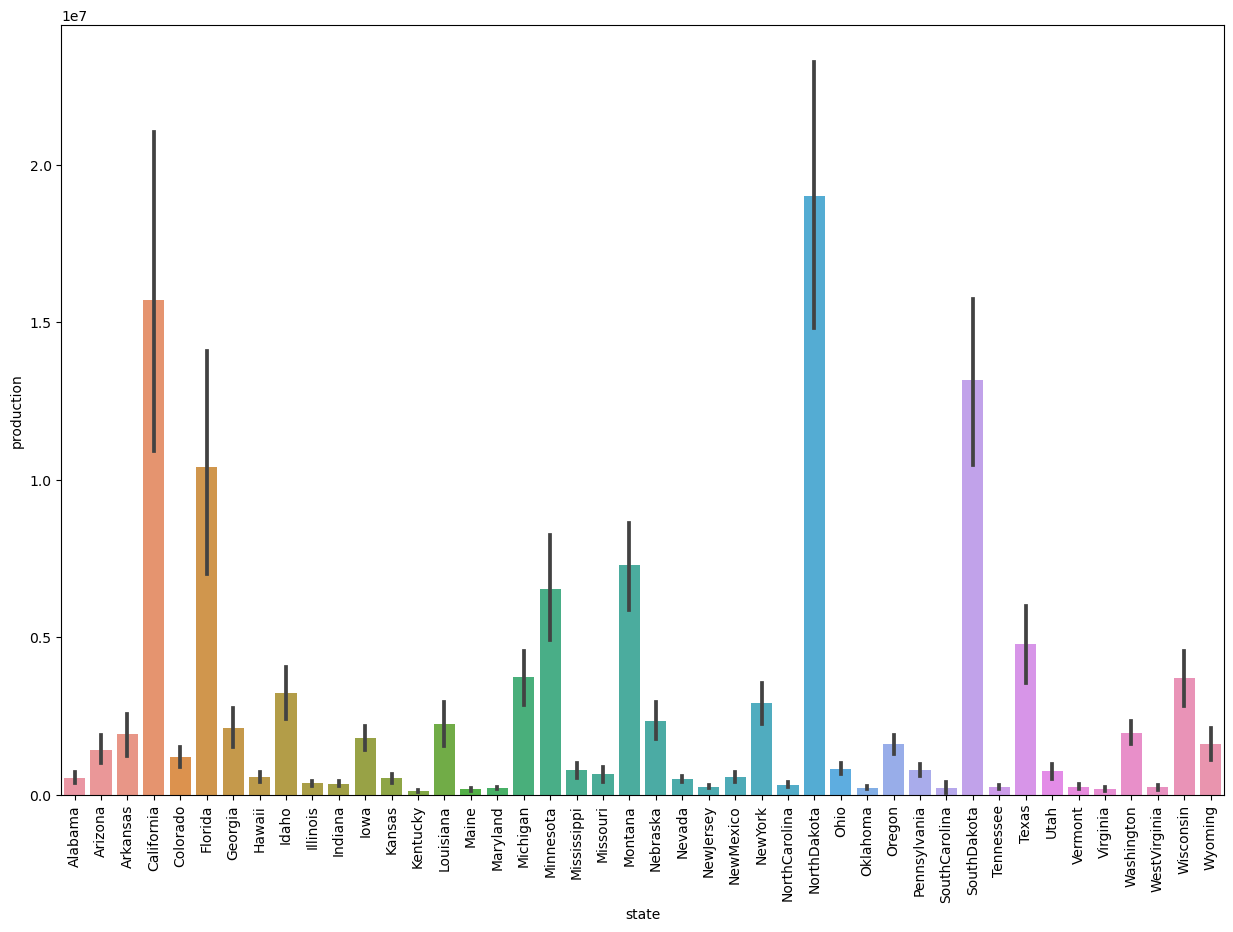

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x="state",y="production")
plt.xticks(rotation=90)
plt.show()

In [31]:
#sorting the graph

In [32]:
data=df.groupby('state').sum().reset_index()

In [33]:
data = data.sort_values('production', ascending=False)
data

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
28,NorthDakota,10710000,2266,513742000,206707000,2863.08,1186219000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
34,SouthDakota,6639000,1950,355726000,218634000,2891.51,619095000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
21,Montana,3725000,2148,197173000,91240000,2961.17,406563000,54216
18,Minnesota,3498000,1885,176581000,51908000,2887.89,310462000,54216
36,Texas,2876000,1921,129441000,41022000,2965.74,284720000,54216
17,Michigan,2168000,1753,101063000,58401000,3311.97,217841000,54216
42,Wisconsin,1698000,1896,99909000,59166000,3410.87,176442000,54216
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000,54216


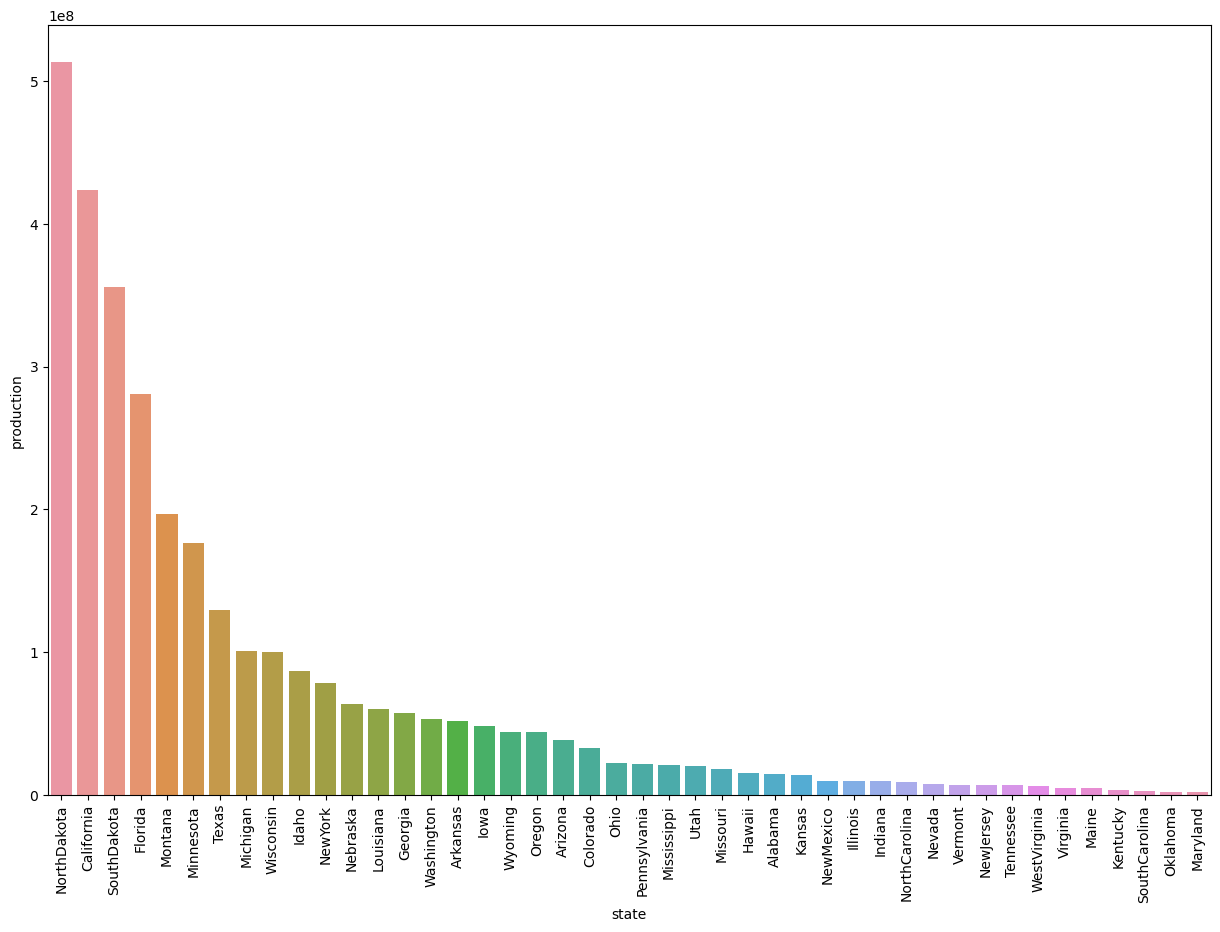

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(data=data,x="state",y="production")
plt.xticks(rotation=90)
plt.show()

In [35]:
#inferences
# top 5 producing states
# North Dakota, California, South Dakota, Florida, Montana

Q3. Change in mean Average price of honey from 1995 to 2021

In [40]:
data=df.groupby('year').mean()['average_price'].reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_16128\1552692504.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=df.groupby('year').mean()['average_price'].reset_index()


In [41]:
data

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581
5,2000,79.023256
6,2001,88.465116
7,2002,133.204545
8,2003,151.068182
9,2004,132.350000


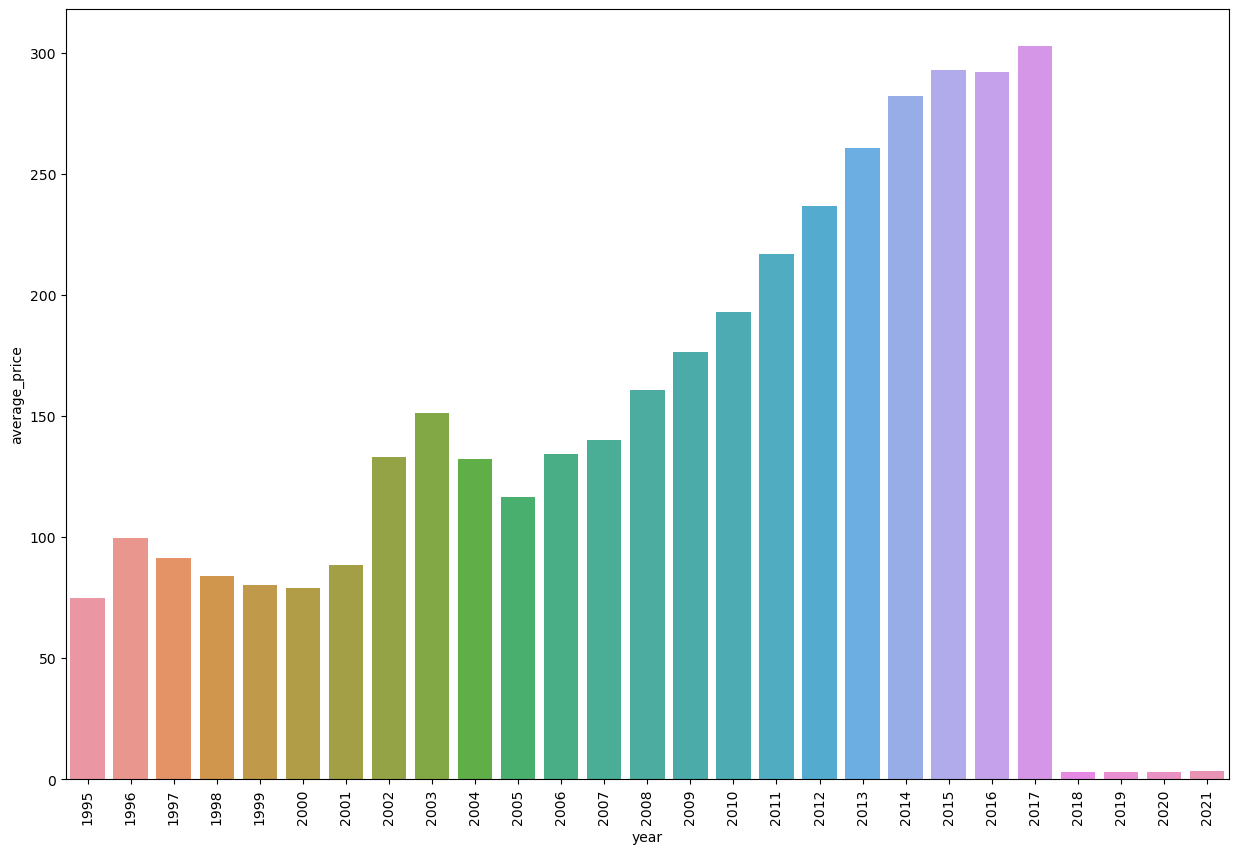

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(data=data,x="year",y="average_price")
plt.xticks(rotation=90)
plt.show()

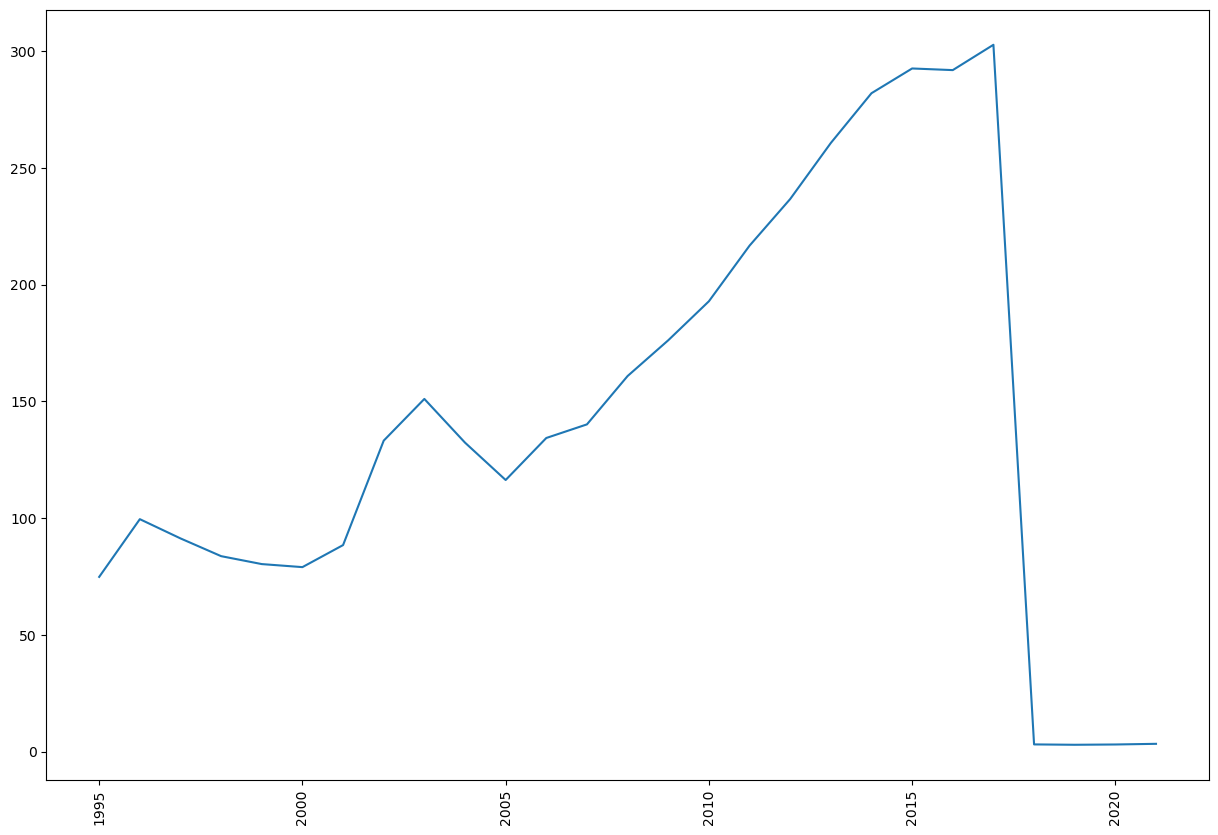

In [45]:
plt.figure(figsize=(15,10))
plt.plot(data['year'], data['average_price'])
plt.xticks(rotation=90)
plt.show()

In [46]:
# inference : from 1995-2017, we see an increasing trend in average price.
# But after 2017, the avg price drops down and remains constant till 2021

Q4. Which was the yr when the production of honey in whole us was the highest?

In [56]:
data=df.groupby('year').sum()['production'].reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_16128\1482936256.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=df.groupby('year').sum()['production'].reset_index()


In [57]:
data

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000
5,2000,220320000
6,2001,185403000
7,2002,170732000
8,2003,180741000
9,2004,182379000


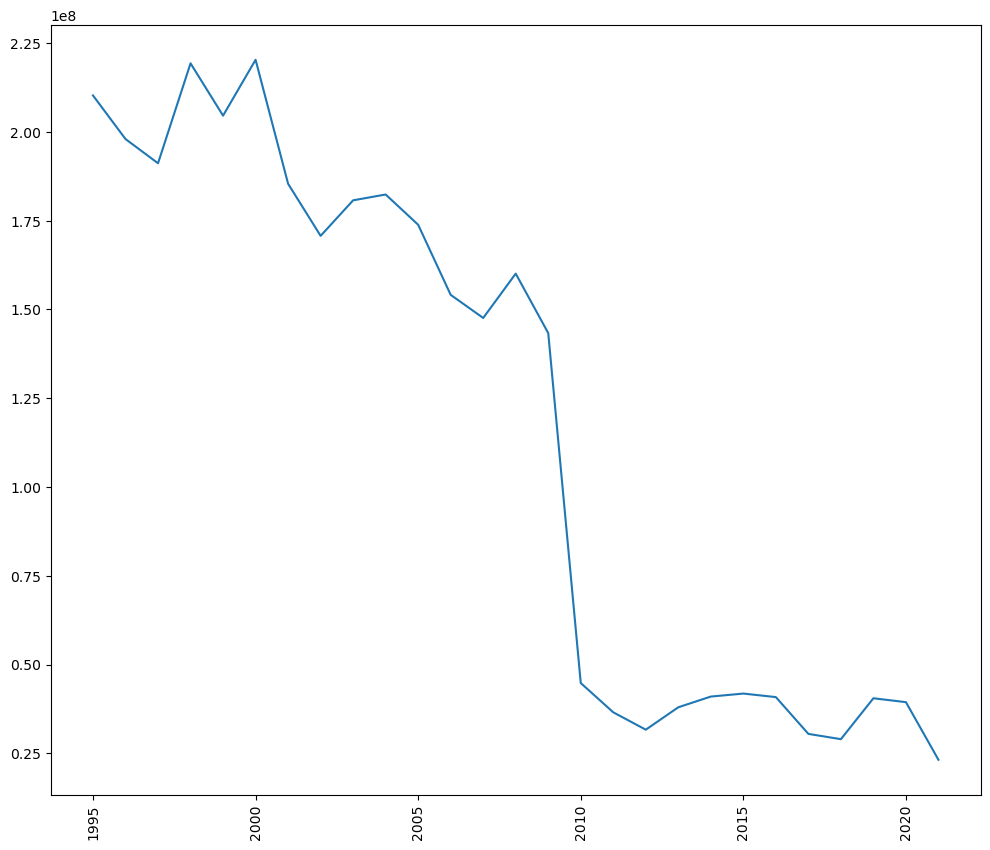

In [58]:
plt.figure(figsize=(12,10))
plt.plot(data['year'], data['production'])
plt.xticks(rotation=90)
plt.show()

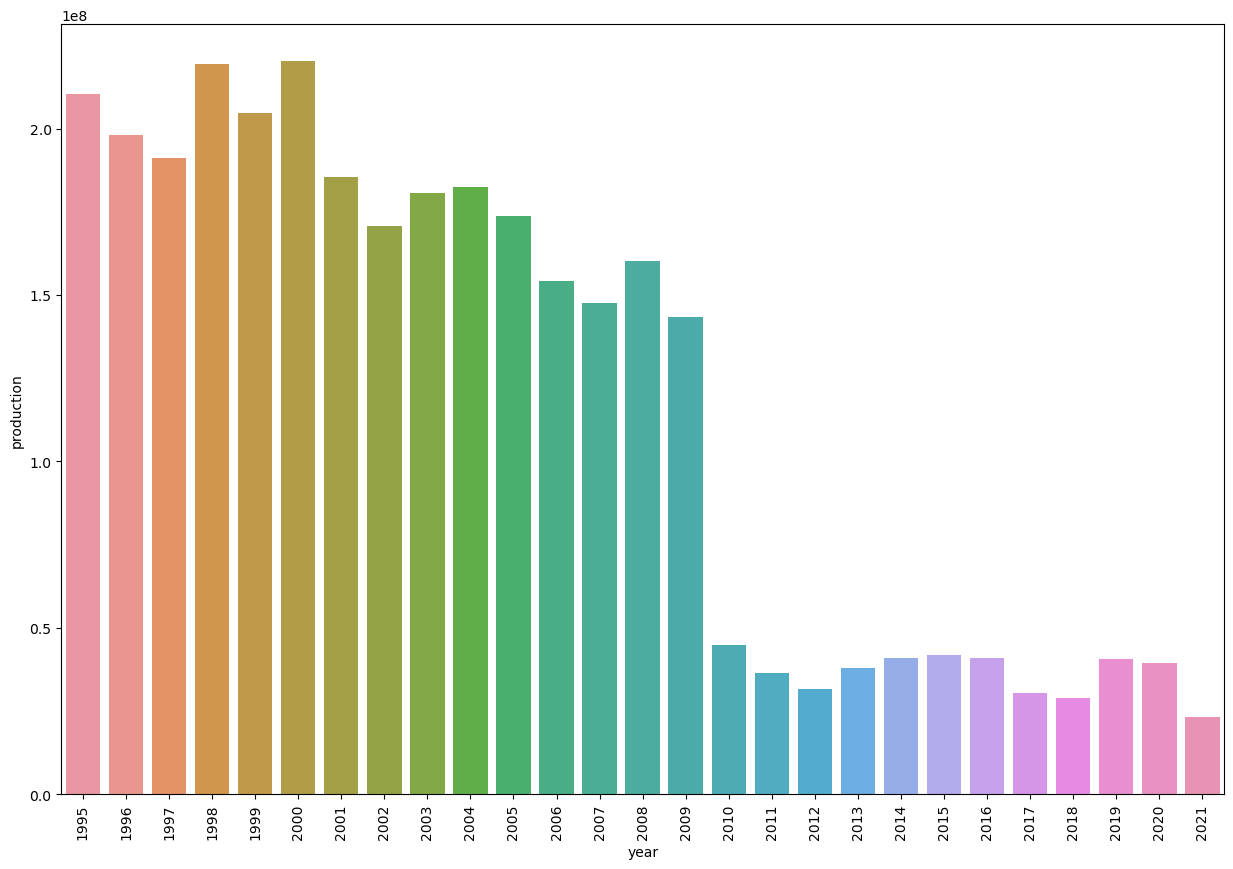

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(data=data,x="year",y="production")
plt.xticks(rotation=90)
plt.show()

In [60]:
#inference:
# from 1995-2000, we see an increasing trend in production.
# But after 2000, the production keeps on decreasing drastically till 2021.

In [61]:
#index of max value
data['production'].idxmax()
#shows 5 = 5th year 2000

5

 Q5. Which state has the highest contribution in year 2000?

In [62]:
data1 = df[df['year']==2000]
data1

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
223,Georgia,55000,57,3135000,376000,63.0,1975000,2000
224,Hawaii,7000,112,784000,125000,81.0,635000,2000
225,Idaho,100000,47,4700000,2679000,52.0,2444000,2000
226,Illinois,8000,61,488000,146000,117.0,571000,2000


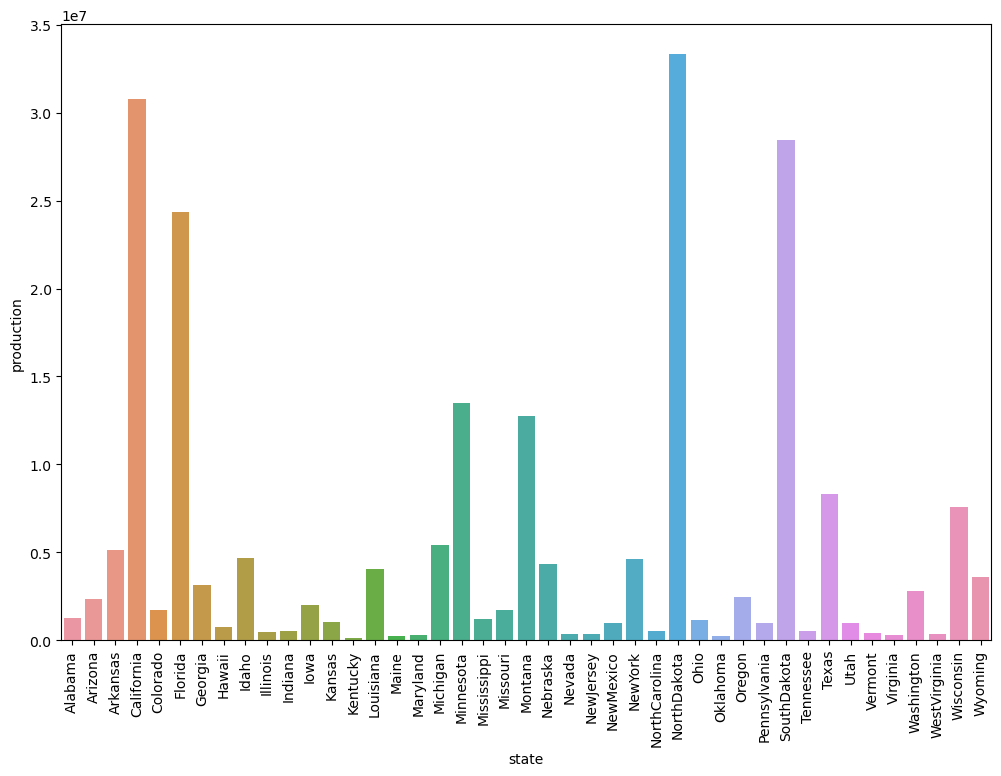

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(data=data1,x="state",y="production")
plt.xticks(rotation=90)
plt.show()

In [64]:
# North Dakota produces the largest amount of honey in year 2000.
# California, South Dakota, Florida stands next

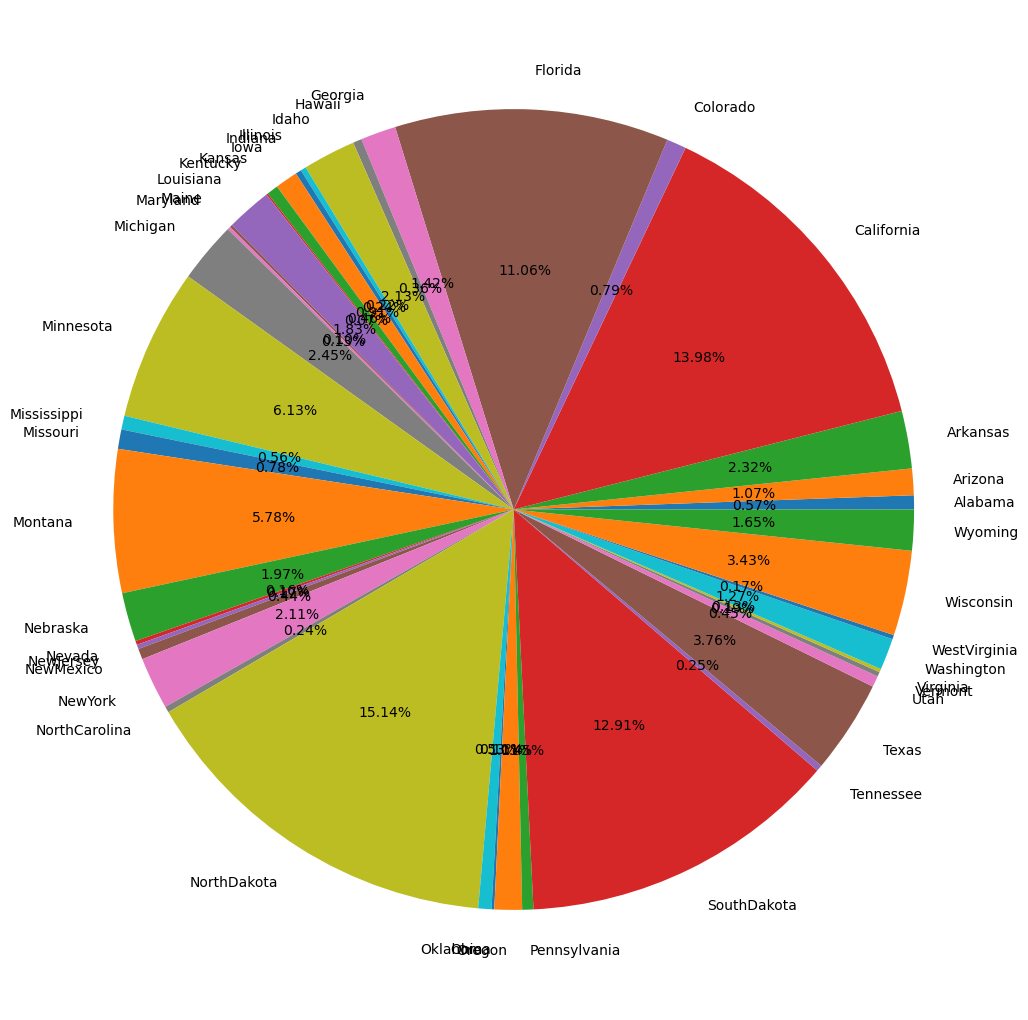

In [73]:
plt.figure(figsize=(13,13))
plt.pie(data1['production'], labels=data1['state'], autopct="%1.2f%%", textprops={'fontsize':10})
plt.show()

 Q6. Which state have the highest number of colonies present in the year 2000?

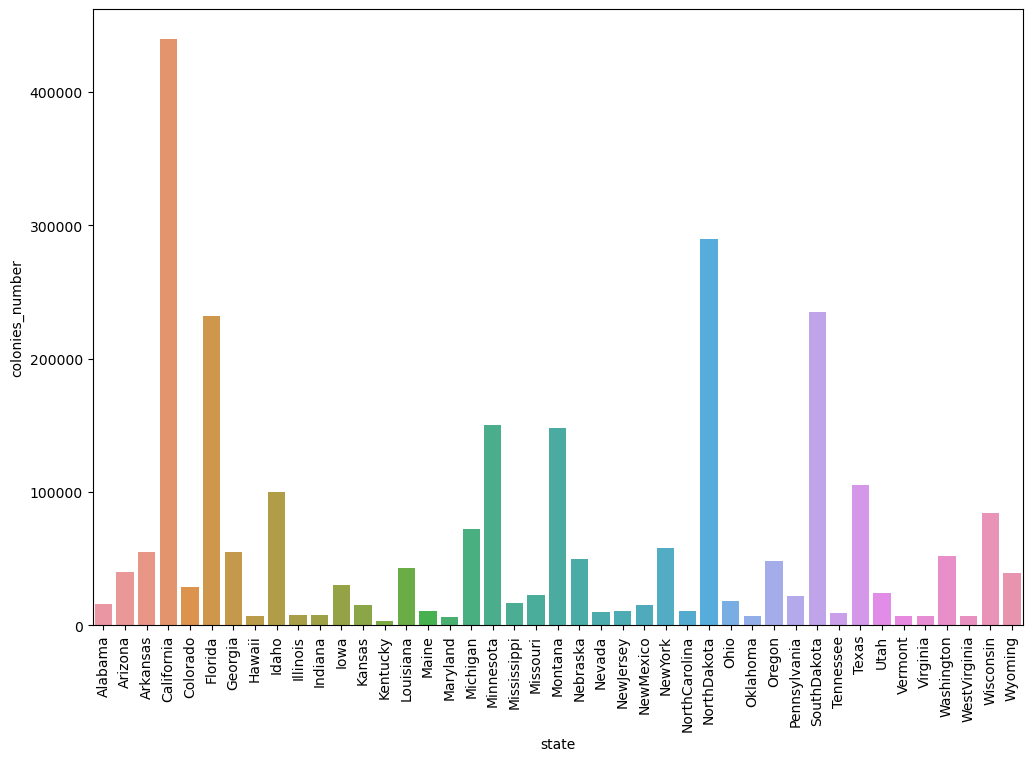

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(data=data1,x="state",y="colonies_number")
plt.xticks(rotation=90)
plt.show()

In [70]:
#California has the highest no. of colonies present in the year 2000